In [1]:
import matplotlib
#matplotlib.use('TKagg')
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import json 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def json_load(filename):
   with open(filename) as f_in:
       return(json.load(f_in)["mean"]["point_estimate"])

In [3]:
def load_files(dirname):
    folders = os.listdir(dirname)
    #print(folders)
    csv_files = list(map(lambda name: os.path.join(os.path.join(dirname, name),'new/raw.csv'), folders))

    #print(csv_files)


    df_from_each_file = (pd.read_csv(f, sep=',') for f in csv_files)
    #print(list(df_from_each_file))
    df_from_each_file = (f.head(1) for f in df_from_each_file)
    #print(list(df_from_each_file))
    return df_from_each_file
dirname = './benchmarks_schedulers/speculative'
df_from_each_file = list(load_files(dirname)) 


In [4]:
df_merged   = pd.concat(df_from_each_file, ignore_index=True)

del df_merged["group"]
del df_merged["throughput_type"]
del df_merged["sample_measured_value"]
del df_merged["unit"]
del df_merged["iteration_count"]



In [5]:
folders = df_merged['value']
df_merged["time"] = list(map(lambda name: json_load(os.path.join(os.path.join(dirname, name),'new/estimates.json')), folders))



In [6]:

time = df_merged['time']
value = df_merged['value']

In [7]:
def size_calculation(value):
    element_size = int(value.split("-")[0])
    vector_size = int(value.split("-")[1])
    matrixs_size =  (((32 * element_size * element_size) * 3) * 2) * vector_size
    #normal_elements_size = ((6 * 32 * 1000) + (2 * 32 * 1000) + (6 * 32)) * vector_size
   
    return matrixs_size /8

In [8]:
#df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(throughput_num, time))))
#df_merged['size'] = list(map(lambda value: value/(1024**2), throughput_num))
#df_merged['time'] = list(map(lambda value: value/1000000, time))
#df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
#df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))



del df_merged["throughput_num"]
df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))
df_merged["throughput_num"] = list(map(lambda v: size_calculation(v), value))
df_merged['time'] = list(map(lambda value: value/1000000, time))
df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(df_merged["throughput_num"], df_merged['time']))))
df_merged['size'] = list(map(lambda value: value/(1024**2), df_merged["throughput_num"]))




In [9]:
a = df_merged.sort_values(by=["size"], ascending=False)
b = df_merged.sort_values(by=["time"], ascending=True)
#a.to_csv( "merged.csv")
#b.to_csv( "merged2.csv")


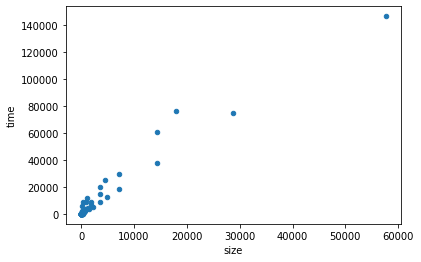

In [10]:

a.plot(x='size', y='time', kind = 'scatter')
plt.show()

<AxesSubplot:xlabel='size'>

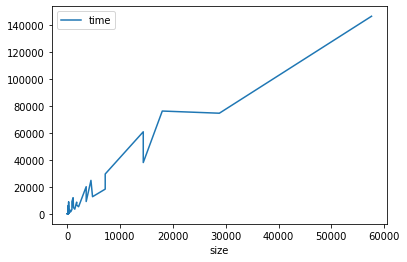

In [11]:
a.plot(x='size', y="time")

<AxesSubplot:xlabel='size', ylabel='time'>

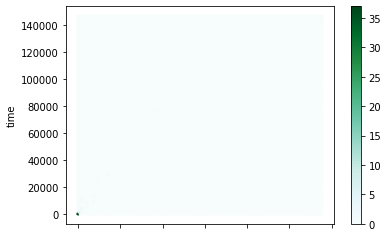

In [12]:
a.plot(x='size', y="time", kind='hexbin')

<AxesSubplot:xlabel='time', ylabel='size'>

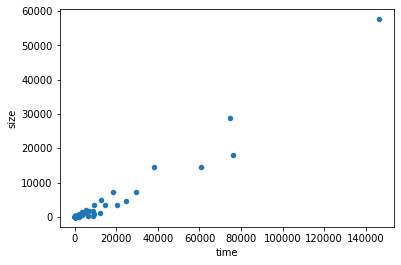

In [13]:
a.plot(x='time', y='size', kind = 'scatter')

<AxesSubplot:xlabel='time'>

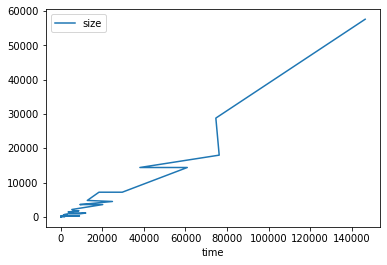

In [14]:
a.plot(x='time', y='size')


In [15]:
a

,function,value,time,element_size,vector_size,throughput_num,throughput,size
10,speculative,512-9600,146472.817239,512,9600,6.039798e+10,4.123494e+05,57600.00000
51,speculative,512-4800,74618.230254,512,4800,3.019899e+10,4.047133e+05,28800.00000
54,speculative,256-12000,76229.687029,256,12000,1.887437e+10,2.475987e+05,18000.00000
60,speculative,512-2400,38061.551087,512,2400,1.509949e+10,3.967125e+05,14400.00000
22,speculative,256-9600,60862.603143,256,9600,1.509949e+10,2.480915e+05,14400.00000
...,...,...,...,...,...,...,...,...
18,speculative,64-24,0.300922,64,24,2.359296e+06,7.840228e+06,2.25000
11,speculative,32-48,0.296322,32,48,1.179648e+06,3.980964e+06,1.12500
41,speculative,64-12,0.295077,64,12,1.179648e+06,3.997760e+06,1.12500
52,speculative,32-24,0.290891,32,24,5.898240e+05,2.027647e+06,0.56250


In [16]:
b.loc[b['time']  > 500 ]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
9,speculative,256-240,548.908977,256,240,3.774874e+08,687704.839506,360.00
2,speculative,64-2400,1074.149088,64,2400,2.359296e+08,219643.253016,225.00
4,speculative,512-96,1415.587566,512,96,6.039798e+08,426663.662733,576.00
27,speculative,128-1200,1543.443228,128,1200,4.718592e+08,305718.533348,450.00
47,speculative,256-360,1824.387573,256,360,5.662310e+08,310367.735678,540.00
13,speculative,512-120,1826.116756,512,120,7.549747e+08,413431.790538,720.00
12,speculative,32-4800,2030.536104,32,4800,1.179648e+08,58095.396472,112.50
16,speculative,64-4800,3229.916562,64,4800,4.718592e+08,146090.213455,450.00
65,speculative,256-600,3376.326733,256,600,9.437184e+08,279510.389427,900.00
67,speculative,512-240,3528.775522,512,240,1.509949e+09,427896.144274,1440.00


In [17]:
b

,function,value,time,element_size,vector_size,throughput_num,throughput,size
49,speculative,32-12,0.288732,32,12,2.949120e+05,1.021402e+06,0.28125
52,speculative,32-24,0.290891,32,24,5.898240e+05,2.027647e+06,0.56250
41,speculative,64-12,0.295077,64,12,1.179648e+06,3.997760e+06,1.12500
11,speculative,32-48,0.296322,32,48,1.179648e+06,3.980964e+06,1.12500
18,speculative,64-24,0.300922,64,24,2.359296e+06,7.840228e+06,2.25000
...,...,...,...,...,...,...,...,...
60,speculative,512-2400,38061.551087,512,2400,1.509949e+10,3.967125e+05,14400.00000
22,speculative,256-9600,60862.603143,256,9600,1.509949e+10,2.480915e+05,14400.00000
51,speculative,512-4800,74618.230254,512,4800,3.019899e+10,4.047133e+05,28800.00000
54,speculative,256-12000,76229.687029,256,12000,1.887437e+10,2.475987e+05,18000.00000


<AxesSubplot:xlabel='time'>

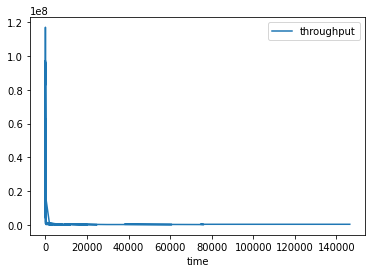

In [18]:
a.plot(x='time', y='throughput')


<AxesSubplot:xlabel='size'>

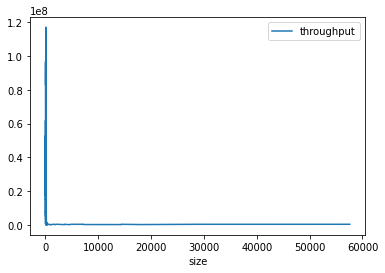

In [19]:
a.plot(x='size', y='throughput')


<AxesSubplot:xlabel='vector_size'>

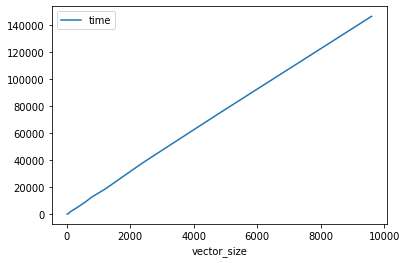

In [20]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

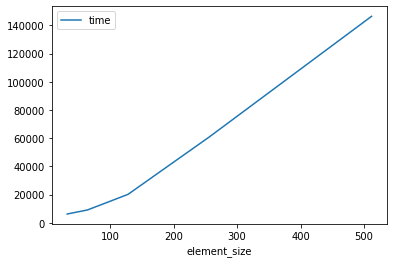

In [21]:
a[a.value.str.contains(r".*-9600")].plot(x='element_size', y='time')


<AxesSubplot:xlabel='vector_size'>

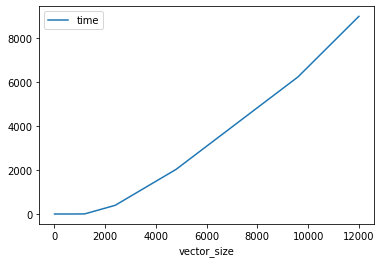

In [22]:
a[a.value.str.contains(r"^32")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

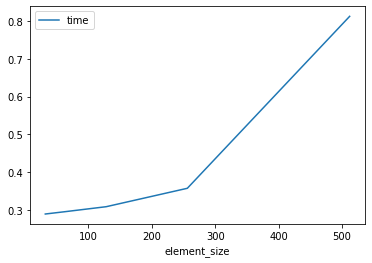

In [23]:
a[a.value.str.contains(r".*-12$")].plot(x='element_size', y='time')


In [24]:
a[a.value.str.contains(r".*-800$")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
64,speculative,512-800,12752.983897,512,800,5.033165e+09,3.946657e+05,4800.00
46,speculative,256-800,4740.466691,256,800,1.258291e+09,2.654361e+05,1200.00
43,speculative,128-800,460.499836,128,800,3.145728e+08,6.831116e+05,300.00
62,speculative,64-800,1.958763,64,800,7.864320e+07,4.014941e+07,75.00
61,speculative,32-800,1.154480,32,800,1.966080e+07,1.703001e+07,18.75


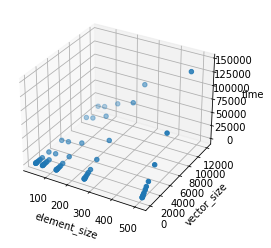

In [25]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(a['element_size'], a['vector_size'],a['time'])
threedee.set_xlabel('element_size')
threedee.set_ylabel('vector_size')
threedee.set_zlabel('time')
plt.show()

No handles with labels found to put in legend.


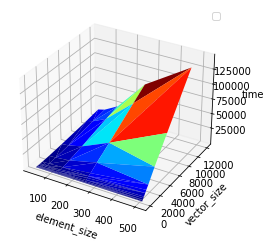

In [26]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()

ax.plot_trisurf(a['element_size'], a['vector_size'],a['time'], cmap=plt.cm.jet, linewidth=0.2)
plt.show()

No handles with labels found to put in legend.


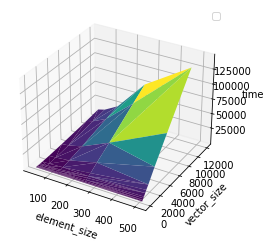

In [27]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['element_size'], a['vector_size'],a['time'], cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()
plt.show()

No handles with labels found to put in legend.


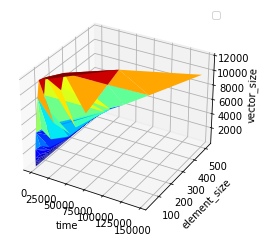

In [28]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['time'], a['element_size'],a['vector_size'], cmap=plt.cm.jet, linewidth=0.1)
ax.set_xlabel("time")
ax.set_ylabel("element_size")
ax.set_zlabel("vector_size")
ax.legend()
plt.show()

<AxesSubplot:xlabel='element_size'>

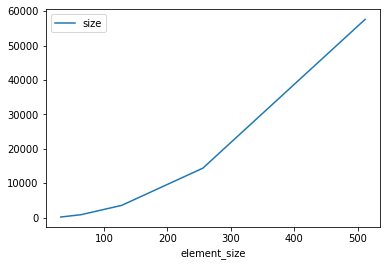

In [29]:
a[a.value.str.contains(r".*-9600")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='element_size'>

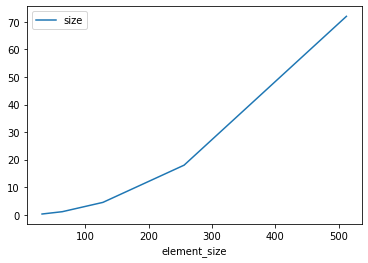

In [30]:
a[a.value.str.contains(r".*-12$")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='vector_size'>

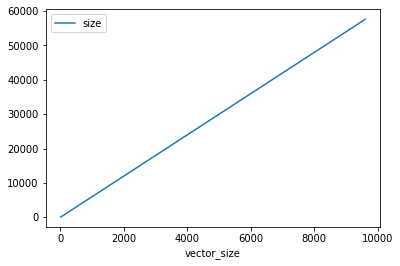

In [31]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='size')


<AxesSubplot:xlabel='vector_size'>

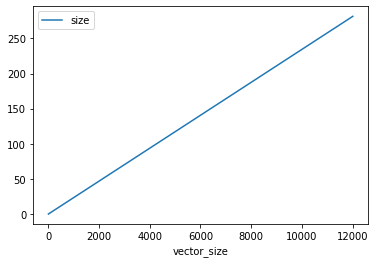

In [32]:
a[a.value.str.contains(r"^32")].plot(x='vector_size', y='size')


In [33]:
b[b.value.str.contains(r"^512")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
44,speculative,512-12,0.813088,512,12,7.549747e+07,9.285272e+07,72.0
29,speculative,512-24,6.803648,512,24,1.509949e+08,2.219323e+07,144.0
34,speculative,512-48,199.402474,512,48,3.019899e+08,1.514474e+06,288.0
4,speculative,512-96,1415.587566,512,96,6.039798e+08,4.266637e+05,576.0
13,speculative,512-120,1826.116756,512,120,7.549747e+08,4.134318e+05,720.0
67,speculative,512-240,3528.775522,512,240,1.509949e+09,4.278961e+05,1440.0
66,speculative,512-360,5315.342913,512,360,2.264924e+09,4.261106e+05,2160.0
35,speculative,512-600,9192.160527,512,600,3.774874e+09,4.106623e+05,3600.0
64,speculative,512-800,12752.983897,512,800,5.033165e+09,3.946657e+05,4800.0
6,speculative,512-1200,18368.987372,512,1200,7.549747e+09,4.110051e+05,7200.0
